In [33]:
import torch
import numpy as np
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, Normalize
import matplotlib.pyplot as plt

In [34]:
data=[[1, 2], [3, 4]]

In [35]:
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [36]:
x_data.size()

torch.Size([2, 2])

In [37]:
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

#input
x = torch.tensor([3.0])

In [38]:
# Forward pass
y_pred = w * x + b
print(f"y_pred : {y_pred.item()}")

y_pred : 7.0


In [39]:
#Loss
y_true = torch.tensor([10.0])
loss = (y_pred - y_true)**2
print(f"loss : {loss.item()}")

loss : 9.0


In [40]:
print(f"w grad before backward: {w.grad}")

w grad before backward: None


In [41]:
loss.backward()

In [42]:
print(f"w grad after backward: {w.grad}")

w grad after backward: tensor([-18.])


In [43]:
learning_rate = 0.01
with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

In [44]:
print(f"nouveaux poids w: {w}, b: {b}")

nouveaux poids w: tensor([2.1800], requires_grad=True), b: tensor([1.0600], requires_grad=True)


In [45]:
w.grad.zero_()
b.grad.zero_()
print(f"w grad after zeroing: {w.grad}")
print(f"b grad after zeroing: {b.grad}")

w grad after zeroing: tensor([0.])
b grad after zeroing: tensor([0.])


In [46]:
import torch.nn as nn

perceptron = nn.Linear(1, 1)

In [47]:
x = torch.tensor([3.0])
print(f"input x: {x}")
y_pred = perceptron(x)
print(f"prediction after weight update y_pred: {y_pred}")

input x: tensor([3.])
prediction after weight update y_pred: tensor([0.6401], grad_fn=<ViewBackward0>)


In [48]:
y_true = torch.tensor([10.0])
criterion = torch.nn.MSELoss()
loss = criterion(y_pred, y_true)

In [49]:
loss.backward()
print(f"gradient du poids: {perceptron.weight.grad}")
print(f"gradient du biais: {perceptron.bias.grad}")

gradient du poids: tensor([[-56.1593]])
gradient du biais: tensor([-18.7198])


In [50]:
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.01)
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

# for epoch in range(20):
#     for x, y in zip(x_train, y_train):
#         y_pred = perceptron(x)
#         loss = criterion(y_pred, y)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

In [51]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcl = nn.Linear(2, 4)
        self.fcl2 = nn.Linear(4, 3)
        self.fcl3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fcl(x)
        x = self.relu(x)
        x = self.fcl2(x)
        x = self.relu(x)
        x = self.fcl3(x)
        x = self.sigmoid(x)
        return x

In [52]:
model = SimpleNet()
print(model)

SimpleNet(
  (fcl): Linear(in_features=2, out_features=4, bias=True)
  (fcl2): Linear(in_features=4, out_features=3, bias=True)
  (fcl3): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [53]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor([5.0])
y_pred = model(x)
print(f"y_pred: {y_pred}")

y_pred: tensor([0.5572], grad_fn=<SigmoidBackward0>)


In [69]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [70]:

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, pin_memory=True, num_workers=4)
test_dataloader = DataLoader(test_data, batch_size=64, pin_memory=True, num_workers=4)

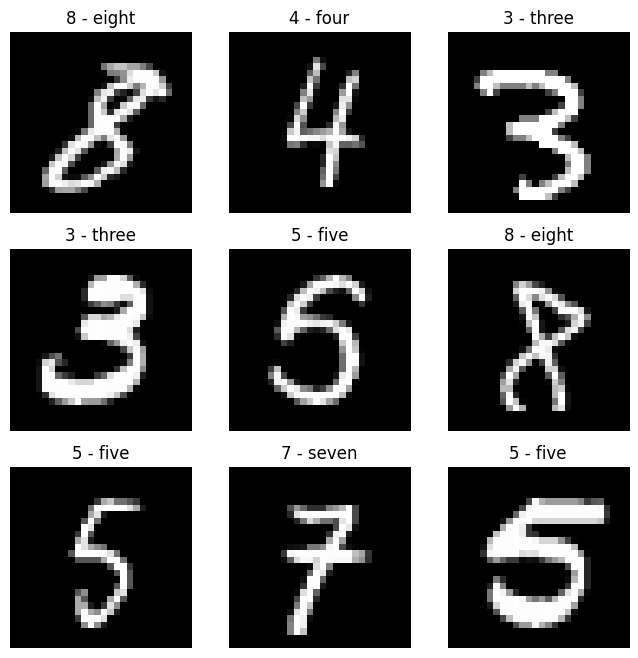

In [71]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(training_data.classes[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

In [72]:
print(training_data.classes)
print(training_data.data.size)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
<built-in method size of Tensor object at 0x00000149693DA5D0>


In [73]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc(x)
        return logits

In [74]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [75]:
x = torch.randn(1, 28, 28, device=device)
logits = model(x)
print(logits)

tensor([[ 0.1552, -0.0943, -0.0689, -0.0844,  0.0386, -0.0226, -0.0445, -0.0023,
         -0.0354, -0.1428]], grad_fn=<AddmmBackward0>)


In [76]:
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)

tensor([[0.1200, 0.0935, 0.0959, 0.0944, 0.1068, 0.1004, 0.0983, 0.1025, 0.0992,
         0.0891]], grad_fn=<SoftmaxBackward0>)


In [77]:
y_pred = pred_probab.argmax(1)
print(y_pred)

tensor([0])


In [78]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [79]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for id, value in enumerate(dataloader):
        X, y = value
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if id % 100 == 0:
            loss, current = loss.item(), (id + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5}]")

In [80]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("done")

Epoch 1
-------------------------------


c:\IIM-SCHOOL\A4\ia1\cours\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


loss: 0.005643  [   64/60000]
loss: 0.000193  [ 6464/60000]
loss: 0.026016  [12864/60000]
loss: 0.006906  [19264/60000]
loss: 0.000049  [25664/60000]
loss: 0.000840  [32064/60000]
loss: 0.000074  [38464/60000]
loss: 0.057490  [44864/60000]
loss: 0.000638  [51264/60000]
loss: 0.006280  [57664/60000]
Test Error: 
 Accuracy: 98.2%, Avg loss: 0.095222 

Epoch 2
-------------------------------
loss: 0.035535  [   64/60000]
loss: 0.000238  [ 6464/60000]
loss: 0.001182  [12864/60000]
loss: 0.000119  [19264/60000]
loss: 0.000639  [25664/60000]
loss: 0.007994  [32064/60000]
loss: 0.000503  [38464/60000]
loss: 0.000757  [44864/60000]
loss: 0.009143  [51264/60000]
loss: 0.000185  [57664/60000]
Test Error: 
 Accuracy: 98.3%, Avg loss: 0.087878 

Epoch 3
-------------------------------
loss: 0.000058  [   64/60000]
loss: 0.001032  [ 6464/60000]
loss: 0.000292  [12864/60000]
loss: 0.000242  [19264/60000]
loss: 0.000184  [25664/60000]
loss: 0.002903  [32064/60000]
loss: 0.000046  [38464/60000]
loss: 

In [87]:
example_inputs = (torch.randn(1, 1, 28, 28),)
model.to("cpu")
onnx_program = torch.onnx.export(model, example_inputs, dynamo=True)
onnx_program.save("image_classifier_model.onnx")

[torch.onnx] Obtain model graph for `NeuralNetwork([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `NeuralNetwork([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅


In [83]:
class ModelWithSoftmax(nn.Module):
    def __init__(self, original_model):
        super().__init__()
        self.model = original_model
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        logits = self.model(x)
        return self.softmax(logits)

model_with_softmax = ModelWithSoftmax(model)
model_with_softmax.eval()

dummy_input = torch.randn(1, 1, 28, 28)
torch.onnx.export(
    model_with_softmax,
    dummy_input,
    "model_with_softmax.onnx",
    input_names=['input'],
    output_names=['probabilities']
)

[torch.onnx] Obtain model graph for `ModelWithSoftmax([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ModelWithSoftmax([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅


ONNXProgram(
    model=
        <
            ir_version=10,
            opset_imports={'': 20},
            producer_name='pytorch',
            producer_version='2.9.1+cpu',
            domain=None,
            model_version=None,
        >
        graph(
            name=main_graph,
            inputs=(
                %"input"<FLOAT,[1,1,28,28]>
            ),
            outputs=(
                %"probabilities"<FLOAT,[1,10]>
            ),
            initializers=(
                %"model.fc.0.weight"<FLOAT,[512,784]>{TorchTensor(...)},
                %"model.fc.0.bias"<FLOAT,[512]>{TorchTensor(...)},
                %"model.fc.2.weight"<FLOAT,[128,512]>{TorchTensor(...)},
                %"model.fc.2.bias"<FLOAT,[128]>{TorchTensor(...)},
                %"model.fc.4.weight"<FLOAT,[10,128]>{TorchTensor(...)},
                %"model.fc.4.bias"<FLOAT,[10]>{TorchTensor<FLOAT,[10]>(Parameter containing: tensor([ 0.0220, -0.0698, -0.0664, -0.1025, -0.0197, -0.0198, -0.0527, -0.036